In [146]:
import sys
if "spnhelp" in sys.modules.keys():
    del sys.modules["spnhelp"]
import spnhelp
import spn.structure.Base as spnBase
import spn.structure.leaves.parametric.Parametric as spnP
import spn.algorithms.Inference as spnInference
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [147]:
plt.rcParams["figure.dpi"] = 100
from scipy.stats import norm
def plot_truncated_gaussian(tail_cut : float, mean : float, sd :float, ax):
    full_domain = np.linspace(mean - 4*sd, mean + 4*sd, 100)

    x = np.linspace(norm.ppf(tail_cut/2, loc=mean, scale=sd), norm.ppf(1-tail_cut/2, loc=mean, scale=sd), 100)

    # correction = tail_cut / (norm.ppf(1-tail_cut/2, loc=mean, scale=sd) - norm.ppf(tail_cut/2, loc=mean, scale=sd))
    
    # y = norm.pdf(x, loc=mean, scale=sd) + correction
    
    # ax.plot(x, y, label="$p/$width added")
    ax.plot(x, norm.pdf(x, loc=mean, scale=sd)/(1-tail_cut), label="scaled by $1-p$")
    
    # ax.plot(full_domain, norm.pdf(full_domain, loc=mean, scale=sd), label="normal")
    ax.plot([-10, 10], [0, 0], color="black", linewidth=1.5)
    ax.legend()

# plot_truncated_gaussian(0.3, 0, 2, plt.gca())

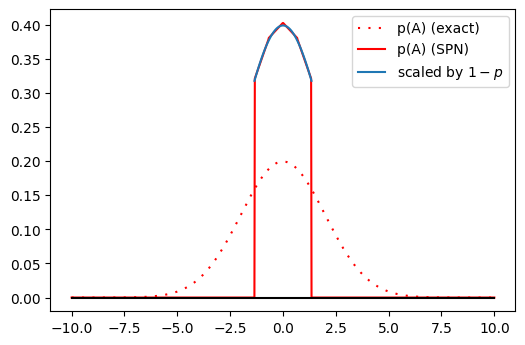

In [148]:
from clg import noise
bn_A = "A" @ (2*noise)
spn = spnhelp.clg_to_spn(bn_A, crit=spnhelp.CRIT_even_partition, crit_param = 4, disc_leaves=True, sloped=True)
ax = spnhelp.plot_marginals(spn, bn_A)
plot_truncated_gaussian(0.5, 0, 2, ax)

In [65]:
spn.parameters

((1, 0.5000000000000128), (2, 0.49999999999998723))

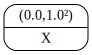

Text(0, 0.5, 'P(X)')

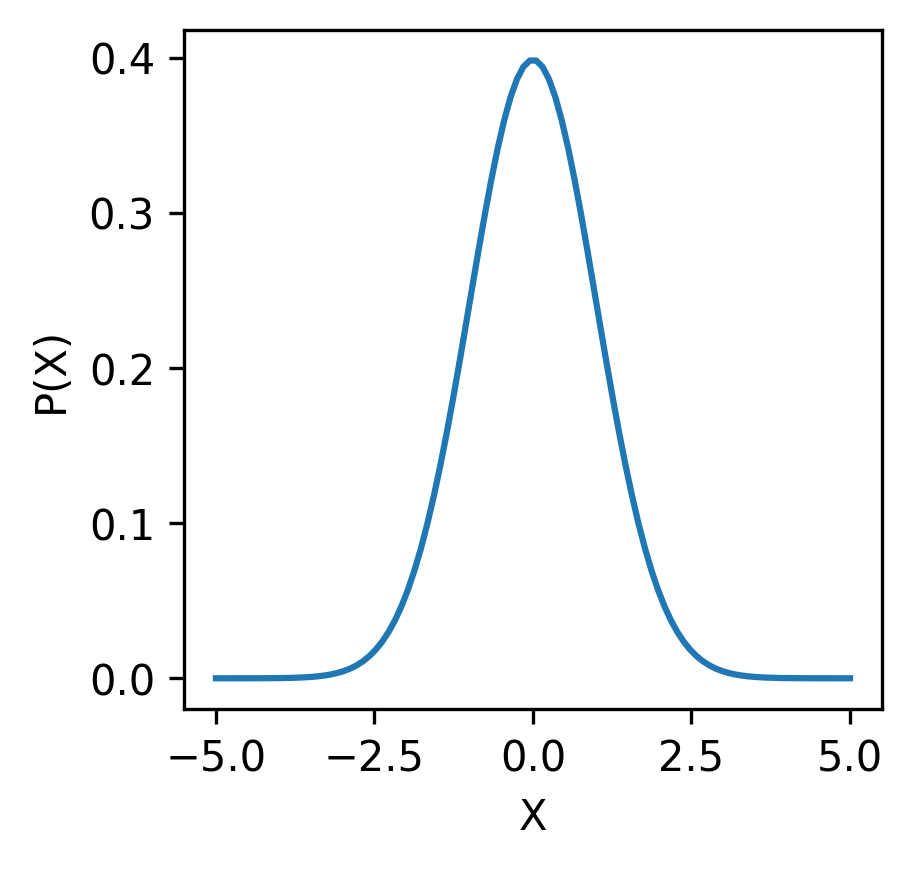

In [6]:
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["figure.dpi"] = 300
spn = spnP.Gaussian(mean=0, stdev=1, scope=0)
display(spnhelp.get_spn_graph(spn, ["X"]))
domain = np.linspace(-5, 5, 100)
plt.plot (domain, spnInference.likelihood(spn, domain.reshape(-1, 1)))
plt.xlabel("X")
plt.ylabel("P(X)")

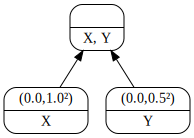

<AxesSubplot:xlabel='Y', ylabel='X'>

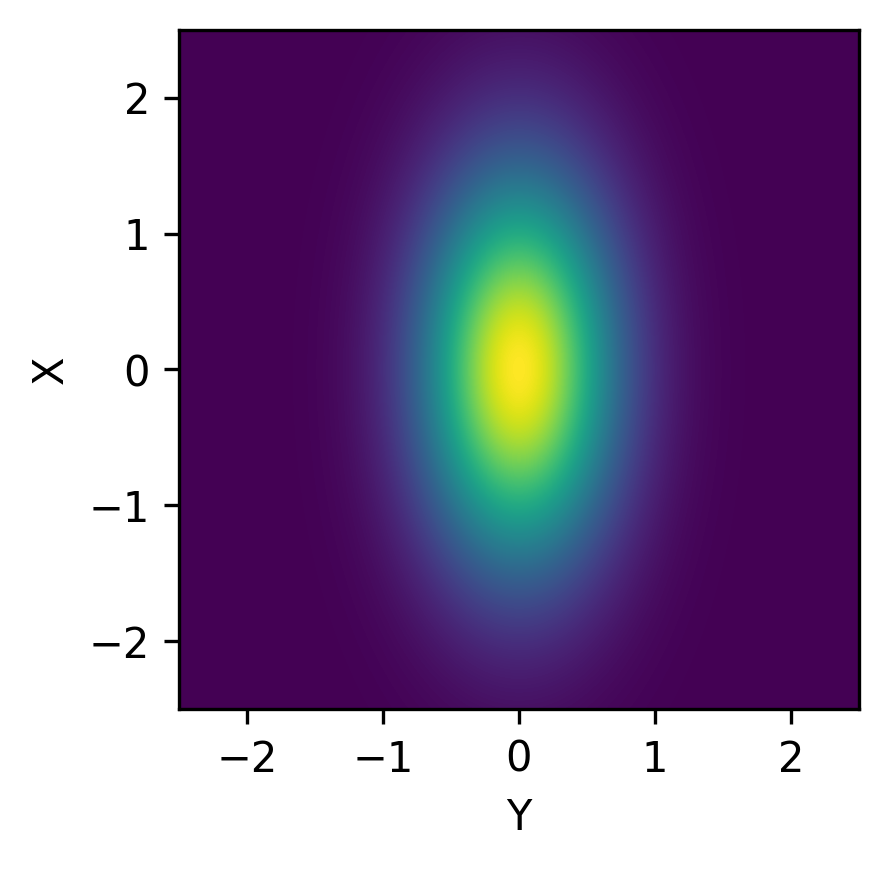

In [7]:
spn = spnP.Gaussian(mean=0, stdev=1, scope=0) * spnP.Gaussian(mean=0, stdev=0.5, scope=1)
display(spnhelp.get_spn_graph(spn, ["X", "Y"]))
info = spnhelp.get_pdf_grid_values(spn, (5, 5), (0,0), 1000)
spnhelp.show_data(info)

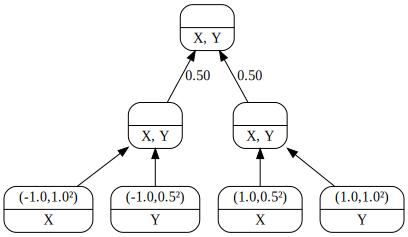

<AxesSubplot:xlabel='Y', ylabel='X'>

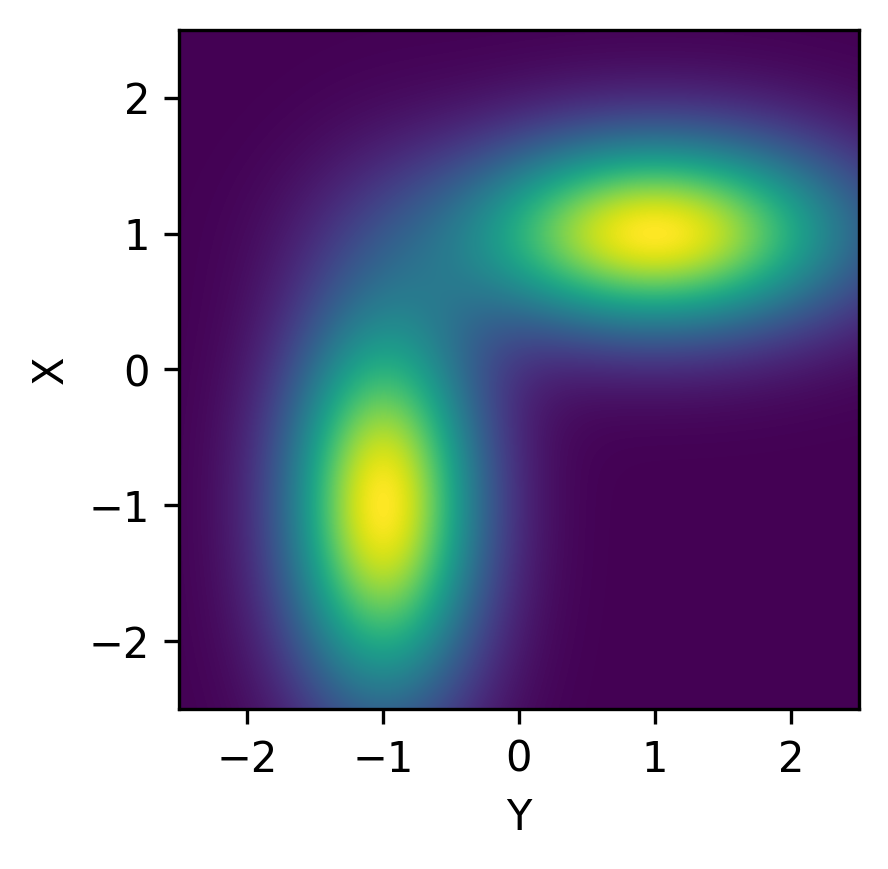

In [8]:
components = [spnP.Gaussian(mean=-1, stdev=1, scope=0) * spnP.Gaussian(mean=-1, stdev=0.5, scope=1), spnP.Gaussian(mean=1, stdev=0.5, scope=0) * spnP.Gaussian(mean=1, stdev=1, scope=1)]
spn = spnBase.Sum([0.5, 0.5], components)
spnBase.assign_ids(spn)
spnBase.rebuild_scopes_bottom_up(spn)

display(spnhelp.get_spn_graph(spn, ["X", "Y"]))
info = spnhelp.get_pdf_grid_values(spn, (5, 5), (0,0), 1000)
spnhelp.show_data(info)